In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from cmcrameri import cm

from pqcd.utils import nsat
from plot_utils import rcparams
plt.rcParams.update(rcparams)

### GP0 pQCD posterior

In [2]:
y = np.linspace(0.5, 2.5, 1000)
n0 = 10*nsat

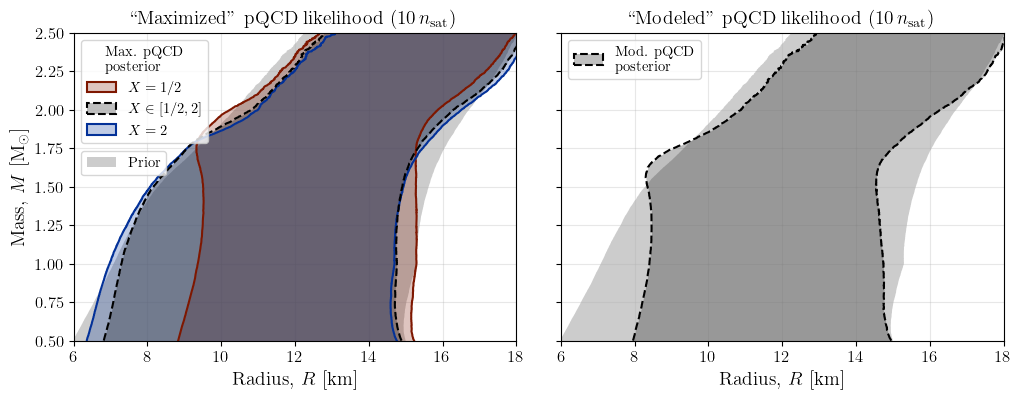

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
fig.subplots_adjust(wspace=0.1)

for ax in axs:
    ax.set_axisbelow(True)
    ax.grid(alpha=0.3)

# GP prior
# --------

prior_quantiles = pd.read_csv(
    f'../data/eos-draws-default/quantiles/r_of_m_quantiles_prior.csv'
)

for ax in axs:
    ax.fill_betweenx(
        y, 
        prior_quantiles.loc[5,:].values, 
        prior_quantiles.loc[95,:].values, 
        color='k',
        alpha=0.2,
        linewidth=0,
        label='Prior',
        zorder=0.1
    )

# GP posteriors
# -------------

X_list = [0.5, 2]
c_list = [cm.roma(0.), cm.roma(1.)]

# Max

zorder_dict = {
    0.5: 2,
    2: 1.5
}

lw = 1.5

for i, X in enumerate(X_list):

    quantiles = pd.read_csv(
        f'../data/eos-draws-default/quantiles/r_of_m_quantiles_pqcd_{int(n0/nsat):02}nsat_X{X}_mu2.6.csv'
    )

    q5 = quantiles.loc[5,:].values
    q95 = quantiles.loc[95,:].values

    # Full opacity

    axs[0].fill_betweenx(
        y, 
        q5, 
        q95, 
        color=list(c_list[i])[:3]+[0.25], 
        edgecolor=c_list[i],
        linewidth=0,
        linestyle='-',
        zorder=0.8,
        )

    axs[0].plot(
        q5,
        y,
        lw=lw,
        linestyle='-',
        c=c_list[i],
        zorder=1.2
    )

    axs[0].plot(
        q95,
        y,
        lw=lw,
        linestyle='-',
        c=c_list[i],
        zorder=1.2
    )

quantiles = pd.read_csv(
    f'../data/eos-draws-default/quantiles/r_of_m_quantiles_pqcd_{int(n0/nsat):02}nsat_Xmarg_mu2.6.csv'
)

q5 = quantiles.loc[5,:].values
q95 = quantiles.loc[95,:].values

# Full opacity

axs[0].fill_betweenx(
    y,
    q5, 
    q95, 
    color=[0,0,0] + [0.25], 
    linewidth=0,
    linestyle='-',
    zorder=0.8,
    )

axs[0].plot(
    q5,
    y,
    lw=lw,
    linestyle='--',
    c='k',
    zorder=1.2
)

axs[0].plot(
    q95,
    y,
    lw=lw,
    linestyle='--',
    c='k',
    zorder=1.2
)

# Marg

c = [0,0,0]

quantiles = pd.read_csv(
    f'../data/eos-draws-default/quantiles/r_of_m_quantiles_pqcd_{int(n0/nsat):02}nsat_marg.csv'
)

q5 = quantiles.loc[5,:].values
q95 = quantiles.loc[95,:].values

# Full opacity

axs[1].fill_betweenx(
    y,
    q5, 
    q95, 
    color=list(c)[:3] + [0.25], 
    linewidth=0,
    linestyle='-',
    zorder=0.8,
    )

axs[1].plot(
    q5,
    y,
    lw=lw,
    linestyle='--',
    c=c,
    zorder=1.2
)

axs[1].plot(
    q95,
    y,
    lw=lw,
    linestyle='--',
    c=c,
    zorder=1.2
)

# ---

for ax in axs:
    ax.set_xlim([6,18])
    ax.set_ylim([y[0], y[-1]])

# ---

custom_handles = [
    mpatches.Patch(
        facecolor=list(c_list[0])[:3]+[0.25],
        edgecolor=c_list[0],
        lw=1.5
    ),
    mpatches.Patch(facecolor=[0,0,0,0.25], edgecolor='k', fill=True, lw=1.5, linestyle='--'),
    mpatches.Patch(
        facecolor=list(c_list[1])[:3]+[0.25],
        edgecolor=c_list[1],
        lw=1.5
    ),
]

custom_labels = [
    '$X = 1/2$',
    '$X \in [1/2,2]$',
    '$X = 2$',
]

l1 = axs[0].legend(
    custom_handles, 
    custom_labels, 
    loc='upper left', 
    title='Max. pQCD\nposterior', 
    fontsize=10.5, 
    title_fontsize=10.5,
)

axs[0].add_artist(l1)

custom_handles = [
    mpatches.Patch(color='k', fill=True, lw=0, alpha=0.2),
]

custom_labels = [
    'Prior',
]

axs[0].legend(
    custom_handles,
    custom_labels,
    loc='upper left',
    fontsize=10.5,
    bbox_to_anchor=(0,0.64)
)

custom_handles = [
    mpatches.Patch(facecolor=[0,0,0,0.25], edgecolor='k', fill=True, lw=1.5, linestyle='--')
]

custom_labels = [
    'Mod. pQCD\nposterior'
]

axs[1].legend(
    custom_handles, 
    custom_labels, 
    loc='upper left', 
    fontsize=10.5)

# ---

for ax in axs:
    ax.set_xlabel(r'Radius, $R$ [km]')
axs[0].set_ylabel(r'Mass, $M$ [$\mathrm{M}_\odot$]')

axs[0].set_title("``Maximized'' pQCD likelihood ($10\,n_\mathrm{sat}$)")
axs[1].set_title("``Modeled'' pQCD likelihood ($10\,n_\mathrm{sat}$)")

fig.savefig('figures/paper/pqcd_m_r_posterior.pdf', bbox_inches='tight')

In [4]:
collated_eos_with_ntov = pd.read_csv(
    '../data/eos-draws-default/collated_np_all_post.csv',
    index_col='eos'
)
collated_ntov = collated_eos_with_ntov['rhoc(M@Mmax)']

collated_eos = pd.read_csv('../data/eos-draws-default/eos-draws-default.csv')

In [5]:
astro_weights = np.exp(
    collated_eos.logweight_total - collated_eos.logweight_total.max()
).values

pqcd_ntov_Xmarg_weights = collated_eos['pqcd_weight_ntov_Xmarg_mu2.6']
pqcd_ntov_marg_weights = collated_eos['pqcd_weight_ntov_marg']

In [6]:
pqcd_ntov_Xmarg_weights = pqcd_ntov_Xmarg_weights.values/np.max(pqcd_ntov_Xmarg_weights.values)
pqcd_ntov_marg_weights = pqcd_ntov_marg_weights.values/np.max(pqcd_ntov_marg_weights.values)

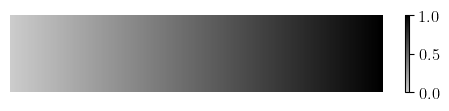

In [7]:
from matplotlib.colors import LinearSegmentedColormap

# Define the colormap
colors = ["#cccccc", "black"]
lin_cmap = LinearSegmentedColormap.from_list("gray_to_black", colors)

# Display the colormap
gradient = np.linspace(0, 1, 256).reshape(1, -1)
plt.figure(figsize=(6, 1))
plt.imshow(gradient, aspect="auto", cmap=lin_cmap)
plt.colorbar()
plt.axis("off")
plt.show()


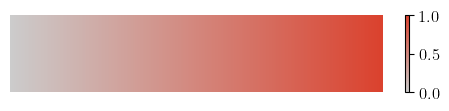

In [8]:
colors = ["#cccccc", '#DB422E']

gp0_cmap = LinearSegmentedColormap.from_list("gray_to_red", colors)

# Display the colormap
gradient = np.linspace(0, 1, 256).reshape(1, -1)
plt.figure(figsize=(6, 1))
plt.imshow(gradient, aspect="auto", cmap=gp0_cmap)
plt.colorbar()
plt.axis("off")
plt.show()

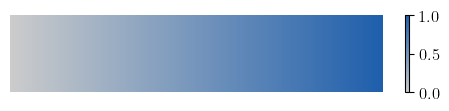

In [9]:
colors = ["#cccccc", cm.roma(0.9)]

gpn_cmap = LinearSegmentedColormap.from_list("gray_to_blue", colors)

# Display the colormap
gradient = np.linspace(0, 1, 256).reshape(1, -1)
plt.figure(figsize=(6, 1))
plt.imshow(gradient, aspect="auto", cmap=gpn_cmap)
plt.colorbar()
plt.axis("off")
plt.show()

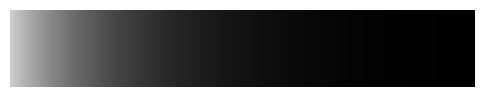

In [10]:
end_color = np.array([204, 204, 204]) / 255  # #cccccc (light gray)
start_color = np.array([0, 0, 0]) / 255  # #ff0000 (red)

# Create a log-spaced sequence of interpolation points
num_points = 100  # More points for smoother interpolation
log_space = np.logspace(0, 2, num_points, base=10)  # Exponentially spaced
log_space = (log_space - log_space.min()) / (log_space.max() - log_space.min())  # Normalize to [0,1]

# Generate colors
colors = [(t, *(start_color * (1 - t) + end_color * t)) for t in log_space]

# Create the colormap
log_cmap = LinearSegmentedColormap.from_list("log_gray_to_red", [c[1:] for c in colors])

# Display the colormap
gradient = 1-np.linspace(0, 1, 256).reshape(1, -1)
plt.figure(figsize=(6, 1))
plt.imshow(gradient, aspect="auto", cmap=log_cmap)
plt.axis("off")
plt.show()

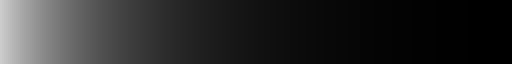

In [11]:
log_cmap.reversed()

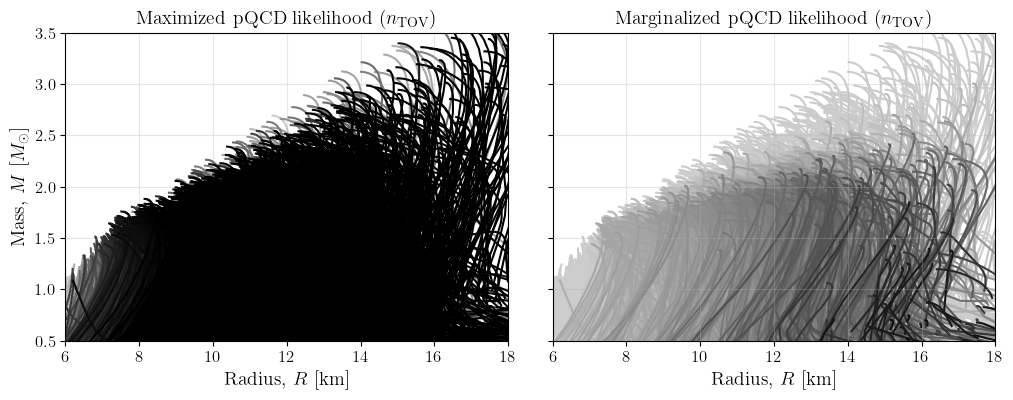

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
fig.subplots_adjust(wspace=0.1)

for ax in axs:
    ax.set_axisbelow(True)
    ax.grid(alpha=0.3)

# GP posteriors
# -------------

for i, n in enumerate(collated_eos.eos.iloc[:5000]):

    macro = pd.read_csv(
        f'../data/eos-draws-default/mrgagn/DRAWmod1000-{int(n)//1000:06}/macro-draw-{int(n):06}.csv'
        )

    mass = macro.M.values
    radius = macro.R.values
    rhoc = macro.rhoc.values

    ntov = collated_ntov.iloc[i]
    turn_index = np.argmin((rhoc-ntov)**2)

    pqcd_weight_Xmarg = pqcd_ntov_Xmarg_weights[i]
    pqcd_weight_marg = pqcd_ntov_marg_weights[i]

    axs[0].plot(
        radius[:turn_index], 
        mass[:turn_index], 
        c=lin_cmap(pqcd_weight_Xmarg),
        zorder=pqcd_weight_Xmarg
    )

    axs[1].plot(
        radius[:turn_index], 
        mass[:turn_index], 
        c=log_cmap(1-pqcd_weight_marg),
        zorder=pqcd_weight_marg
    )

# ---

for ax in axs:
    ax.set_xlim(6, 18)
    ax.set_ylim(0.5, 3.5)

# ---

for ax in axs:
    ax.set_xlabel(r'Radius, $R$ [km]')
axs[0].set_ylabel(r'Mass, $M$ [$M_\odot$]')

axs[0].set_title('Maximized pQCD likelihood ($n_\mathrm{TOV}$)')
axs[1].set_title('Marginalized pQCD likelihood ($n_\mathrm{TOV}$)');

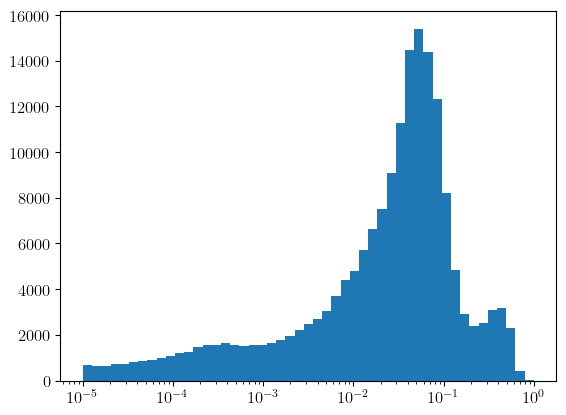

In [13]:
fig, ax = plt.subplots()

bins = np.logspace(-5, 0, 50)
ax.hist(pqcd_ntov_marg_weights, bins=bins)
ax.set_xscale('log')

In [14]:
def rescale(weight, vmin=1e-5):
    if weight < vmin:
        return 0
    else:
        log_weight = np.log10(weight)
        return (log_weight-np.log10(vmin))/(0-np.log10(vmin))

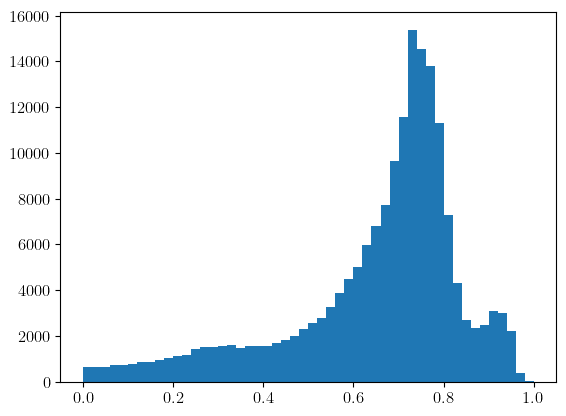

In [15]:
plot_weights = np.log10(pqcd_ntov_marg_weights[pqcd_ntov_marg_weights > 1e-5])
rescaled_weights = (plot_weights - min(plot_weights))/(max(plot_weights) - min(plot_weights))

fig, ax = plt.subplots()

ax.hist(rescaled_weights, bins=50);

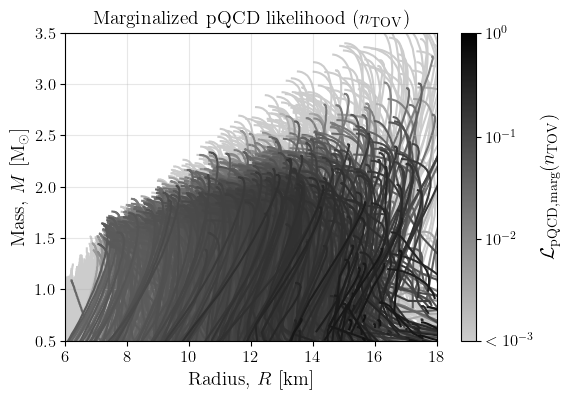

In [16]:
fig, ax = plt.subplots(figsize=(6,4))

ax.set_axisbelow(True)
ax.grid(alpha=0.3)

# GP posteriors
# -------------

for i, n in enumerate(collated_eos.eos.iloc[:5000]):

    macro = pd.read_csv(
        f'../data/eos-draws-default/mrgagn/DRAWmod1000-{int(n)//1000:06}/macro-draw-{int(n):06}.csv'
        )

    mass = macro.M.values
    radius = macro.R.values
    rhoc = macro.rhoc.values

    ntov = collated_ntov.iloc[i]
    turn_index = np.argmin((rhoc-ntov)**2)

    pqcd_weight_marg = rescale(pqcd_ntov_marg_weights[i], vmin=1e-3)

    ax.plot(
        radius[:turn_index], 
        mass[:turn_index], 
        c=lin_cmap(pqcd_weight_marg),
        zorder=pqcd_weight_marg
    )

# ---

ax.set_xlim(6, 18)
ax.set_ylim(0.5, 3.5)

# ---

cbar = fig.colorbar(
    plt.cm.ScalarMappable(cmap=lin_cmap),
    ax=ax, 
    ticks=[0, 0.33, 0.66, 1],
    label='$\mathcal{L}_\mathrm{pQCD,marg}(n_\mathrm{TOV})$'
    )

cbar.set_ticklabels(['$< 10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^{0}$'])

# ---

ax.set_xlabel(r'Radius, $R$ [km]')
ax.set_ylabel(r'Mass, $M$ [$\mathrm{M}_\odot$]')

ax.set_title('Marginalized pQCD likelihood ($n_\mathrm{TOV}$)');

fig.savefig('figures/paper/pqcd_m_r_likelihood.pdf', bbox_inches='tight')

# Comparison figure

In [17]:
gp0_astro_weights = np.exp(collated_eos.logweight_total.values - max(collated_eos.logweight_total.values))
gp0_astro_weights /= max(gp0_astro_weights)

In [18]:
gp0_combined_weights = gp0_astro_weights*pqcd_ntov_marg_weights
gp0_combined_weights /= max(gp0_combined_weights)

In [19]:
eos_dir = '../data/eos-draws-modified/gp1'

collated_eos_gp1 = pd.read_csv(f'{eos_dir}/eos-draws-modified-gp1.csv')

gp1_astro_weights = np.exp(
    collated_eos_gp1.logweight_total - collated_eos_gp1.logweight_total.max()
).values

gp1_astro_weights /= max(gp1_astro_weights)

In [20]:
eos_dir = '../data/eos-draws-modified/gp2'

collated_eos_gp2 = pd.read_csv(f'{eos_dir}/eos-draws-modified-gp2.csv')

gp2_astro_weights = np.exp(
    collated_eos_gp2.logweight_total - collated_eos_gp2.logweight_total.max()
).values

gp2_astro_weights /= max(gp2_astro_weights)

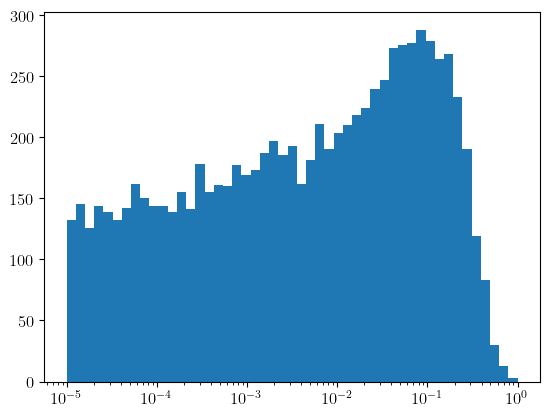

In [21]:
fig, ax = plt.subplots()

bins = np.logspace(-5, 0, 50)
ax.hist(gp1_astro_weights, bins=bins)
ax.set_xscale('log')

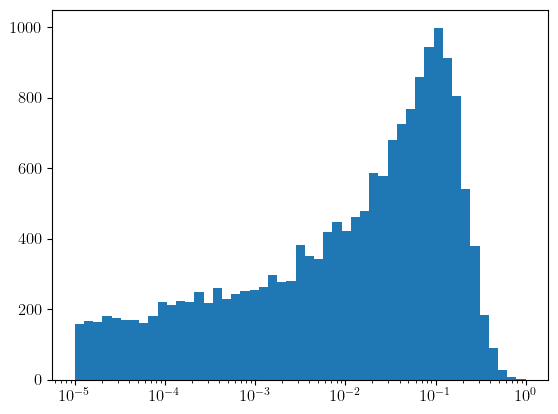

In [22]:
fig, ax = plt.subplots()

bins = np.logspace(-5, 0, 50)
ax.hist(gp2_astro_weights, bins=bins)
ax.set_xscale('log')

In [23]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

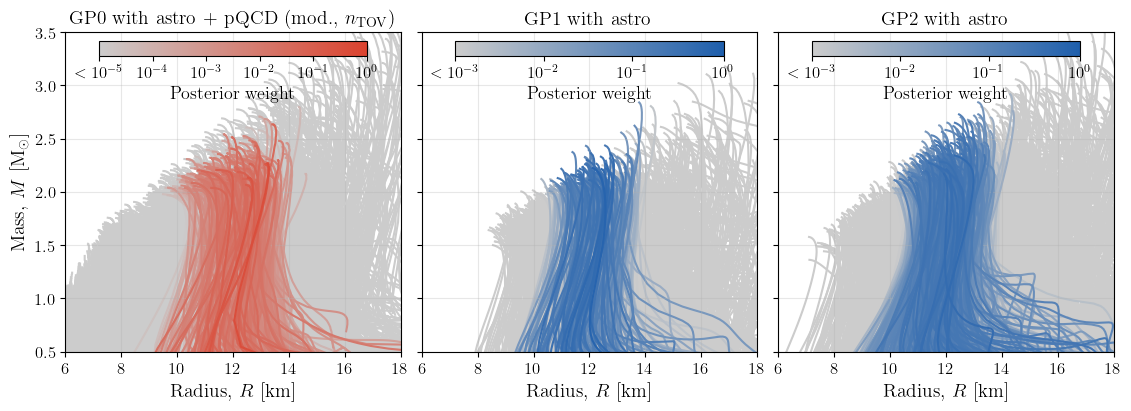

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(11.2,4), sharey=True, layout='constrained')
# fig.subplots_adjust(wspace=0.1)

for ax in axs:
    ax.set_axisbelow(True)
    ax.grid(alpha=0.3)

# ---

# GP0
# ---

for i, n in enumerate(collated_eos.eos.iloc[:5000]):

    macro = pd.read_csv(
        f'../data/eos-draws-default/mrgagn/DRAWmod1000-{int(n)//1000:06}/macro-draw-{int(n):06}.csv'
        )

    mass = macro.M.values
    radius = macro.R.values
    rhoc = macro.rhoc.values

    ntov = collated_ntov.iloc[i]
    turn_index = np.argmin((rhoc-ntov)**2)

    weight = rescale(gp0_combined_weights[i], vmin=1e-5)

    if weight < 1e-2:
        rasterized = True
    else:
        rasterized = False

    axs[0].plot(
        radius[:turn_index], 
        mass[:turn_index], 
        c=gp0_cmap(weight),
        zorder=weight,
        rasterized=rasterized
    )

# GP1
# ---

for i, n in enumerate(collated_eos_gp1.eos.iloc[25000:27000]):

    macro = pd.read_csv(
        f'../data/eos-draws-modified/gp1/margagn/DRAWmod1000-{int(n)//1000:06}/macro-eos-draw-{int(n):06}.csv'
        )

    mass = macro.M.values
    radius = macro.R.values

    radius_mask = radius < 30
    mass = mass[radius_mask]
    radius = radius[radius_mask]

    turn_index = np.argmax(mass)

    weight = rescale(gp1_astro_weights[i+25000], vmin=1e-3)

    if weight < 1e-2:
        rasterized = True
    else:
        rasterized = False

    axs[1].plot(
        radius[:turn_index], 
        mass[:turn_index], 
        c=gpn_cmap(weight),
        zorder=weight,
        rasterized=rasterized
    )

# GP2
# ---

for i, n in enumerate(collated_eos_gp2.eos.iloc[:2000]):

    macro = pd.read_csv(
        f'../data/eos-draws-modified/gp2/margagn/DRAWmod1000-{int(n)//1000:06}/macro-eos-draw-{int(n):06}.csv'
        )

    mass = macro.M.values
    radius = macro.R.values

    radius_mask = radius < 30
    mass = mass[radius_mask]
    radius = radius[radius_mask]

    turn_index = np.argmax(mass)

    weight = rescale(gp2_astro_weights[i], vmin=1e-3)

    if weight < 1e-2:
        rasterized = True
    else:
        rasterized = False

    axs[2].plot(
        radius[:turn_index], 
        mass[:turn_index], 
        c=gpn_cmap(weight),
        zorder=weight,
        rasterized=rasterized
    )

# ---

cb0axes = inset_axes(axs[0], width="80%", height="5%", loc='upper center') 
cbar0 = fig.colorbar(
    plt.cm.ScalarMappable(cmap=gp0_cmap),
    cax=cb0axes, 
    ticks=[0, 0.2, 0.4, 0.6, 0.8, 1],
    orientation='horizontal',
    )
cbar0.set_ticklabels(['$< 10^{-5}$', '$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^{0}$'])
cbar0.set_label('Posterior weight', size=13)

cb1axes = inset_axes(axs[1], width="80%", height="5%", loc='upper center') 
cbar1 = fig.colorbar(
    plt.cm.ScalarMappable(cmap=gpn_cmap),
    cax=cb1axes, 
    ticks=[0, 0.33, 0.66, 1],
    orientation='horizontal',
    )
cbar1.set_ticklabels(['$< 10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^{0}$'])
cbar1.set_label('Posterior weight', size=13)

cb2axes = inset_axes(axs[2], width="80%", height="5%", loc='upper center') 
cbar2 = fig.colorbar(
    plt.cm.ScalarMappable(cmap=gpn_cmap),
    cax=cb2axes, 
    ticks=[0, 0.33, 0.66, 1],
    orientation='horizontal',
    )
cbar2.set_ticklabels(['$< 10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^{0}$'])
cbar2.set_label('Posterior weight', size=13)

# ---

for ax in axs:
    ax.set_xlim(6, 18)
axs[0].set_ylim(0.5, 3.5)

# ---

for ax in axs:
    ax.set_xlabel(r'Radius, $R$ [km]')
axs[0].set_ylabel(r'Mass, $M$ [$\mathrm{M}_\odot$]')

axs[0].set_title('GP0 with astro + pQCD (mod., $n_\mathrm{TOV}$)')
axs[1].set_title('GP1 with astro')
axs[2].set_title('GP2 with astro')

fig.savefig('figures/paper/astro_pqcd_m_r_posterior.pdf', dpi=300);